<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F


In [64]:
#creating a class that instantiate a module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [65]:
torch.manual_seed(41)
model = Model()

In [66]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [67]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [68]:
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
X = my_df.drop('species', axis =1)
y = my_df['species']

In [70]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
#conver these to nunmpy arrays
X= X.values
y = y.values

In [72]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [75]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [76]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [77]:
#set the criterion of the model to measure the error, to set the predictions on how far the data
criterion =nn.CrossEntropyLoss()
#choose Adam Optimizer, lr = learning_rate (if error doesn't go down after a bunch of iteration (epochs), lower learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [78]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [79]:
#Train our Model
# Epochs (One run throughout the training data in nn)
epochs =100
losses = []

for i in range (epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train)

  #Measure the loss/error

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10==0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation - Take the error rate of forward propagation and feed it
  #back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'epochs')

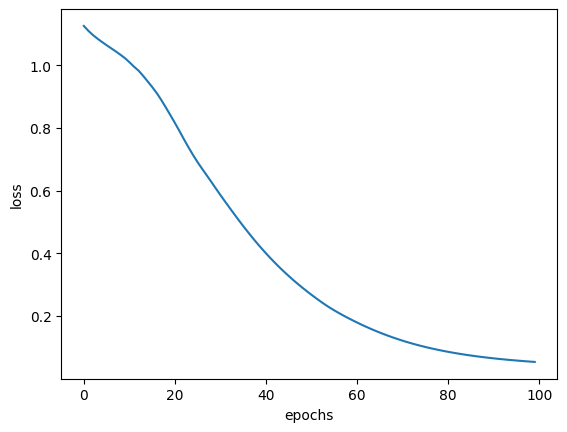

In [80]:
#graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [81]:
#Evaluate model on test set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [82]:
 loss

tensor(0.1315)

In [83]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1.}, {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')

    #Correct or not:

    if y_val.argmax().item() ==y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.0, tensor([-5.8760,  4.4628,  6.5124]) 	 2 	2
2.0, tensor([-7.5436,  4.1670,  9.7255]) 	 2 	2
3.0, tensor([-8.4504,  5.1271, 10.1987]) 	 2 	2
4.0, tensor([-4.3398,  5.6267,  2.5608]) 	 1 	1
5.0, tensor([-7.1825,  4.8754,  8.2992]) 	 2 	2
6.0, tensor([-3.3974,  5.3463,  1.2803]) 	 1 	1
7.0, tensor([-5.9231,  4.9822,  5.9997]) 	 2 	2
8.0, tensor([-4.2881,  5.7003,  2.3889]) 	 1 	1
9.0, tensor([-6.5356,  4.9257,  7.1260]) 	 2 	2
10.0, tensor([-8.0509,  4.4129, 10.3286]) 	 2 	2
11.0, tensor([-5.6762,  4.9500,  5.6215]) 	 2 	2
12.0, tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	0
13.0, tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	0
14.0, tensor([-2.1108,  4.0515,  0.5799]) 	 1 	1
15.0, tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	0
16.0, tensor([-5.4724,  5.1165,  5.0934]) 	 2 	1
17.0, tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	0
18.0, tensor([-5.8075,  4.6053,  6.2458]) 	 1 	2
19.0, tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	0
20.0, tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	0
21.0, tensor([-2.6189,  4.561

In [84]:
new_iris = torch.tensor([4.7, 3.2,1.3,0.2])

In [85]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [86]:
#save NN
torch.save(model.state_dict(), 'my_model.pt')

In [87]:
#save our model
new_model = Model()
new_model.load_state_dict(torch.load('my_model.pt'))

<All keys matched successfully>

In [88]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [89]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
#Convert image files into a tensor of 4-dimension (ht, width, images, color)
transform = transforms.ToTensor()

In [92]:
#Train_data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform = transform)

In [93]:
#Test_data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform = transform)

In [94]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [95]:
#Create a small batch
train_loader = DataLoader(train_data, batch_size=10, shuffle = True)
test_loader = DataLoader(test_data, batch_size=10, shuffle = False)

In [96]:
#Define our CNN model
# Describe Convolutional layer and what its doing
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [97]:
#Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [98]:
X_train.shape

torch.Size([1, 28, 28])

In [99]:
x= X_train.view(1,1,28,28)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [100]:
#Perform our first convolution
x = F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [101]:
#pass the pooling layer
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 6, 13, 13])

In [102]:
x = F.relu(conv2(x)) # again we didnt set the padding, it will loose some of the padding dimensions
x.shape

torch.Size([1, 16, 11, 11])

In [103]:
#Pooling layer -
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 16, 5, 5])

In [104]:
#creating a class that instantiate a module
class ConvolutionalNetwork (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) #2*2 pool with stide 2
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2) #2*2 pool with stide 2

    #Flatten the image
    X = X.view(-1, 5*5*16) # negative one so we can vary with batch size.
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [105]:
torch.manual_seed(41)
model = ConvolutionalNetwork()

In [106]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [107]:
#Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #smaller learning rate the larger it takes to run the model


In [111]:
import time

start_time = time.time()

#Create Variables to track things

epochs = 5
train_losses = []
test_losses= []
train_correct = []
test_correct = []

# For loop of epochs
for i in range (epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b +=1 # Start our batches @1
    y_pred = model (X_train) #get predicted values, not flattened
    loss = criterion(y_pred, y_train) # predictions how off are we
    predicted = torch.max(y_pred.data, 1 )[1] # add upto the number of predictions, indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from the batch, true -1 and falseo and sum them up
    trn_corr +=batch_corr # to keep the track of batch corrected.



  #Train

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print out some results
    if b % 600 ==0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #Test

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] #adding up correct predictions
      tst_corr += (predicted ==y_test).sum() # t=1 and f=0 - sum away
      loss = criterion(y_val, y_test)

  test_losses.append(loss)
  test_correct.append(tst_corr)




current_time = time.time()

total = current_time - start_time

print(f'Training Time: {total/60} Minutes')

Epoch: 0 Batch: 600 Loss: 4.2915326048387215e-07
Epoch: 0 Batch: 1200 Loss: 0.000602786778472364
Epoch: 0 Batch: 1800 Loss: 0.009741751477122307
Epoch: 0 Batch: 2400 Loss: 0.0001910523569677025
Epoch: 0 Batch: 3000 Loss: 0.0009470426593907177
Epoch: 0 Batch: 3600 Loss: 0.003824744839221239
Epoch: 0 Batch: 4200 Loss: 0.0005217822035774589
Epoch: 0 Batch: 4800 Loss: 0.00039202129119075835
Epoch: 0 Batch: 5400 Loss: 0.0011686442885547876
Epoch: 0 Batch: 6000 Loss: 0.0001995609636651352
Epoch: 1 Batch: 600 Loss: 5.6623525779286865e-06
Epoch: 1 Batch: 1200 Loss: 5.3166054385656025e-06
Epoch: 1 Batch: 1800 Loss: 3.921958068531239e-06
Epoch: 1 Batch: 2400 Loss: 2.3588787371409126e-05
Epoch: 1 Batch: 3000 Loss: 0.0005270157125778496
Epoch: 1 Batch: 3600 Loss: 0.004876184277236462
Epoch: 1 Batch: 4200 Loss: 0.0025144999381154776
Epoch: 1 Batch: 4800 Loss: 4.50927036581561e-05
Epoch: 1 Batch: 5400 Loss: 0.001143931527622044
Epoch: 1 Batch: 6000 Loss: 0.0007353376131504774
Epoch: 2 Batch: 600 Los

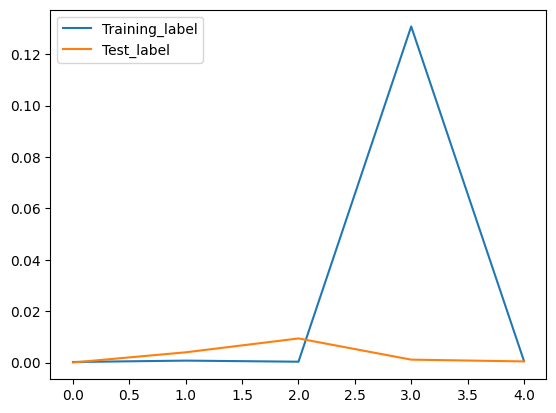

In [113]:
#graph the losses
train_losses = [i.item() for i in train_losses]

plt.plot(train_losses, label ='Training_label')
plt.plot(test_losses, label ='Test_label')
plt.legend()
plt.show()

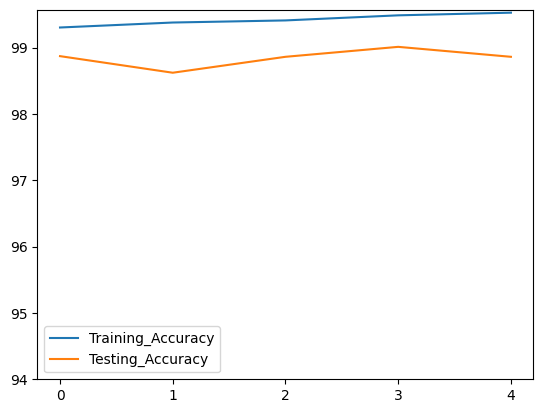

In [116]:
#graph the accuracy
plt.plot([t/600 for t in train_correct], label = 'Training_Accuracy')
plt.plot ([t/100 for t in test_correct], label = 'Testing_Accuracy')
# Setting the x-ticks from 0 to 4
plt.xticks(ticks=[0, 1, 2, 3, 4])

# Setting the y-ticks from 94 to 99
plt.yticks(ticks=[94, 95, 96, 97, 98, 99])
plt.legend()
plt.show()

In [117]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle = False)

In [118]:
with torch.no_grad():
  correct =0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()



In [120]:
correct.item()

9886

In [121]:
test_data[4143] # Tensor with an image - it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [122]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

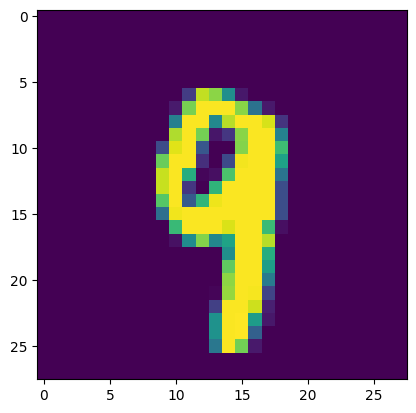

In [124]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [128]:
#pass through the image through our model
model.eval()
with torch.no_grad():
  new_pred = model(test_data[4143][0].view(1,1,28,28)) #batch size of 1, 1 color channel, 28X28 image

In [129]:
new_pred

tensor([[-2.3591e+01, -2.0132e+01, -2.0057e+01, -1.6018e+01, -8.9224e+00,
         -1.7681e+01, -4.0914e+01, -9.0606e+00, -1.6559e+01, -2.4983e-04]])

In [130]:
new_pred.argmax()

tensor(9)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17451657.22it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 569862.60it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3805778.64it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3788134.57it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Train Loss: 0.2753, Val Loss: 0.0815, Train Acc: 91.58, Val Acc: 97.62
Epoch [2/10], Train Loss: 0.0990, Val Loss: 0.0484, Train Acc: 96.98, Val Acc: 98.66
Epoch [3/10], Train Loss: 0.0734, Val Loss: 0.0496, Train Acc: 97.77, Val Acc: 98.62
Epoch [4/10], Train Loss: 0.0605, Val Loss: 0.0418, Train Acc: 98.12, Val Acc: 98.83
Epoch [5/10], Train Loss: 0.0493, Val Loss: 0.0406, Train Acc: 98.49, Val Acc: 98.84
Epoch [6/10], Train Loss: 0.0431, Val Loss: 0.0406, Train Acc: 98.63, Val Acc: 98.98
Epoch [7/10], Train Loss: 0.0366, Val Loss: 0.0399, Train Acc: 98.84, Val Acc: 98.95
Epoch [8/10], Train Loss: 0.0332, Val Loss: 0.0406, Train Acc: 98.98, Val Acc: 99.04
Epoch [9/10], Train Loss: 0.0287, Val Loss: 0.0417, Train Acc: 99.07, Val Acc: 99.06
Epoch [10/10], Train Loss: 0.0254, Val Loss: 0.0495, Train Acc: 99.23, Val Acc: 99.01


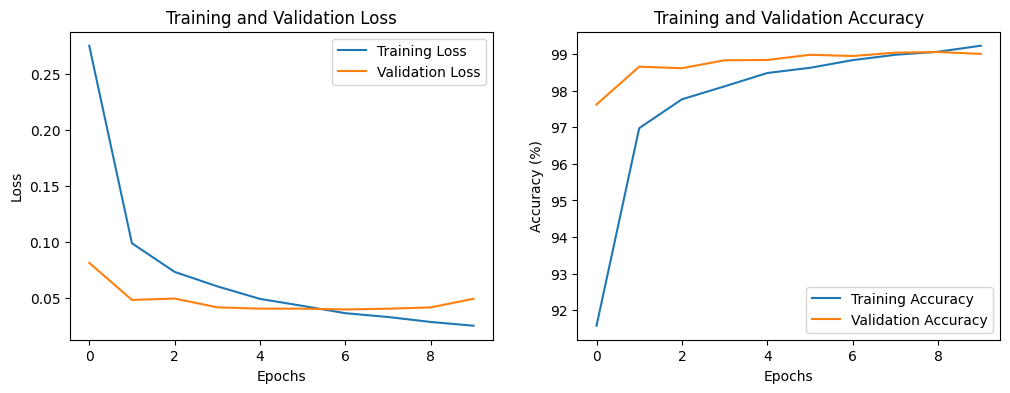

Testing Accuracy: 99.24%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Load and Normalize the Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split training data into training and validation sets
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
train_data, val_data = random_split(training_data, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(testing_data, batch_size=64, shuffle=False)

# 2. Define the CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Train the Model
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(running_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

# 4. Plot Training and Validation Loss/Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# 5. Evaluate on Test Data
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Testing Accuracy: {test_accuracy:.2f}%')
